<h1 align="center">DataWorkshop Foundation | Warsaw Team | Project: No-shows</h1>
<h2 align="center">AUC-ROC Curve on different models</h2>




Data used: [Kaggle Dataset](https://www.kaggle.com/joniarroba/noshowappointments)

Author: [Jan Tarasiewicz](https://github.com/JBalcony)

## Table of contents

1. [Libraries](#Libraries)
2. [Logistic regression](#Logistic-regression)
3. [Data processing](#Data-processing)
4. [Data processing](#Data-processing)
5. [Data processing](#Data-processing)
6. [Data processing](#Data-processing)

### Libraries

In [30]:
# Importing Libraries
import numpy as np
import pandas as pd
# from random import randint
# from random import uniform

# Models
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import LogisticRegression

# Model tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Metrics from sklearn.metrics
from sklearn import  metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting
import matplotlib.pyplot as plt



In [2]:
# Reading data from hair_salon_no_show_wrangled_df.csv file
df = pd.read_csv("noshow_processed_data.csv")
df.sample(5)

,Unnamed: 0,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,NoShow,YearBookingDate,MonthBookingDate,DayBookingDate,YearAppointmentDate,MonthAppointmentDate,DayAppointmentDate,HourOfDayBooking,DaysToAppointment,AppointmentWeekDay
56345,56347,465693639711624,0,26,16,1,0,0,0,0,...,1,2016,4,27,2016,5,16,0,19,0
92411,92416,85986492844775,0,55,21,0,1,0,0,0,...,0,2016,6,2,2016,6,2,0,0,3
59771,59773,524741667396,1,40,26,0,0,0,0,0,...,1,2016,4,27,2016,5,3,0,6,1
18385,18385,23728951623665,0,31,22,0,0,0,0,0,...,0,2016,5,10,2016,5,10,0,0,1
77625,77630,769593776497,0,58,27,0,0,0,0,0,...,0,2016,5,4,2016,5,6,0,2,4


In [3]:
features_df = df.drop(['NoShow'], axis=1)

features = features_df.columns

X = df[features]
y = df['NoShow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

kfold = StratifiedKFold(n_splits=5)



### Logistic regression

In [4]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400],
             'penalty': ['l1', 'l2']}

grid_1 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/john/anaconda3/lib/

{'C': 0.001, 'penalty': 'l2'}

###  KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_2 = {
            'n_neighbors': [2, 5, 10],
            'metric': ['euclidean', 'cityblock']
}

grid_2 = GridSearchCV(KNeighborsClassifier(n_neighbors=2, metric='euclidean'), param_grid_2, cv=kfold, return_train_score=True, n_jobs=-2)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'metric': 'cityblock', 'n_neighbors': 10}

### DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier


param_grid_3 = {
            'max_depth': [5,10,20,30,40,100,200],
            'min_samples_split': [3,5,10,20,30,40],
            'max_leaf_nodes': [10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(DecisionTreeClassifier(), param_grid_3, cv=kfold, return_train_score=True, n_jobs=-2,verbose=1)

grid_3.fit(X_train, y_train)
grid_3.best_params_

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 1470 out of 1470 | elapsed:  1.5min finished


{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 3}

### XGB Classifier

In [25]:
param_grid_4 = {
    'max_depth': [3, 5],
    'learning_rate': [0.001, 0.05, 0.1],
    'n_estimators': [50, 150, 400],
    'gamma': [0, 1],
    'colsample_bytree': [1, 0.5],
    'subsample': [1, 0.5],
    'min_child_weight': [1, 10]
}

estimator = xgboost.XGBClassifier(n_jobs=-2)

grid_4 = RandomizedSearchCV(n_iter=30,estimator=estimator, 
                             param_distributions=param_grid_4, 
                      cv=kfold, 
                      return_train_score=True,verbose=1,n_jobs=-2)



grid_4.fit(X_train, y_train)
grid_4.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  2.6min
/home/john/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:  8.0min finished


{'subsample': 0.5,
 'n_estimators': 400,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.5}

In [36]:
models = []
models.append(('LogisticRegression', grid_1.best_estimator_))
models.append(('KNeighbors', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('XGBoost', grid_4.best_estimator_))

In [41]:
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []

for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

LogisticRegression
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0
accuracy_score: 0.8002261931689663
KNeighbors


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_score: 0.3525
recall_score: 0.03192934782608696
f1_score: 0.05855481727574751
accuracy_score: 0.7948880343813617
DecisionTree
precision_score: 0.7692307692307693
recall_score: 0.0022644927536231885
f1_score: 0.004515692029803568
accuracy_score: 0.8005428636055191
XGBoost
precision_score: 0.5584
recall_score: 0.07903079710144928
f1_score: 0.13846459035905576
accuracy_score: 0.8035286134358742


In [42]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }

df_1 = pd.DataFrame(data=d)
df_1.insert(loc=0, column='Method', value=['LogisticRegression','KNeighbors','DecisionTree','XGBoost'])
df_1

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.000000,0.000000,0.000000,0.800226,0.501033
1,KNeighbors,0.352500,0.031929,0.058555,0.794888,0.540484
2,DecisionTree,0.769231,0.002264,0.004516,0.800543,0.723745
3,XGBoost,0.558400,0.079031,0.138465,0.803529,0.752043


### Drawing ROC Curve

LogisticRegression
KNeighbors
DecisionTree
XGBoost


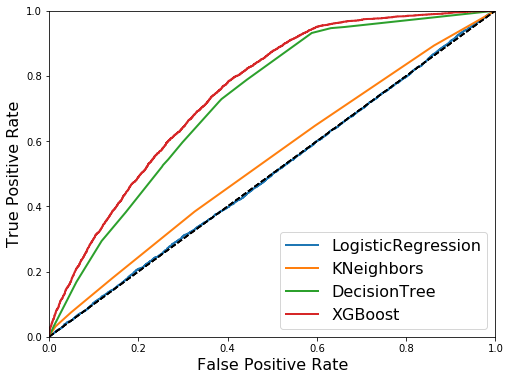

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

In [45]:
def plot_feature_importances(model, data):
    n_features = data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [51]:
plt.figure(figsize=(10, 10))
plot_feature_importances(grid_4.best_estimator_, df)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'

<Figure size 720x720 with 0 Axes>